# Project - Bank Churn Prediction

### Background: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Dataset:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

### Attributes:
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer.
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has. 
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept. 
- EstimatedSalary: Estimated salary of the customer. 
- Exited: Did they leave the bank after all?

## Import Necessary Libraries & Format Notebook

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

from sklearn.metrics import roc_auc_score, accuracy_score

In [2]:
# Adjust display and formatting settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [30, 8]
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500)

In [3]:
# Check tensorflow version
tf.__version__

'2.3.1'

## Exploratory Data Analysis

### Initial Data Observations

In [4]:
# load the dataset from the CSV file
df = pd.read_csv('bank.csv')

In [5]:
# Visualize the data
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure     Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.000              1          1               1   
1       1  83,807.860              1          0               1   
2       8 159,660.800              3          1               0   
3       1       0.000              2          0               0   
4       2 125,510.820              1          1               1   
5       8 113,755.780              2          1               0   
6       7       0.000              2          1               1   
7       4 115,046.740              4          1               0   
8       4 142,051.070              2          0               1   
9       2 134,603.880              1          1               1   

   EstimatedSalary  Exited  
0      101,348.880       1  
1      112,542.580       0  
2      113,931.570       1  
3       93,826.630       0  
4       79,084.100       0  
5      149,756.710       1  
6       10,062.800       0  
7      119,346.880       1  
8       74,940.500       0  
9       71,725.730       0

In [6]:
# Shape of our dataset
df.shape

(10000, 14)

In [7]:
# Display data types and determine if any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Display statistical metrics of our data
df.describe().transpose()

count           mean        std            min  \
RowNumber       10,000.000      5,000.500  2,886.896          1.000   
CustomerId      10,000.000 15,690,940.569 71,936.186 15,565,701.000   
CreditScore     10,000.000        650.529     96.653        350.000   
Age             10,000.000         38.922     10.488         18.000   
Tenure          10,000.000          5.013      2.892          0.000   
Balance         10,000.000     76,485.889 62,397.405          0.000   
NumOfProducts   10,000.000          1.530      0.582          1.000   
HasCrCard       10,000.000          0.706      0.456          0.000   
IsActiveMember  10,000.000          0.515      0.500          0.000   
EstimatedSalary 10,000.000    100,090.240 57,510.493         11.580   
Exited          10,000.000          0.204      0.403          0.000   

                           25%            50%            75%            max  
RowNumber            2,500.750      5,000.500      7,500.250     10,000.000  
CustomerId      15,628,528.250 15,690,738.000 15,753,233.750 15,815,690.000  
CreditScore            584.000        652.000        718.000        850.000  
Age                     32.000         37.000         44.000         92.000  
Tenure                   3.000          5.000          7.000         10.000  
Balance                  0.000     97,198.540    127,644.240    250,898.090  
NumOfProducts            1.000          1.000          2.000          4.000  
HasCrCard                0.000          1.000          1.000          1.000  
IsActiveMember           0.000          1.000          1.000          1.000  
EstimatedSalary     51,002.110    100,193.915    149,388.247    199,992.480  
Exited                   0.000          0.000          0.000          1.000

In [9]:
# Create a profile report
profile = df.profile_report()                                     
profile

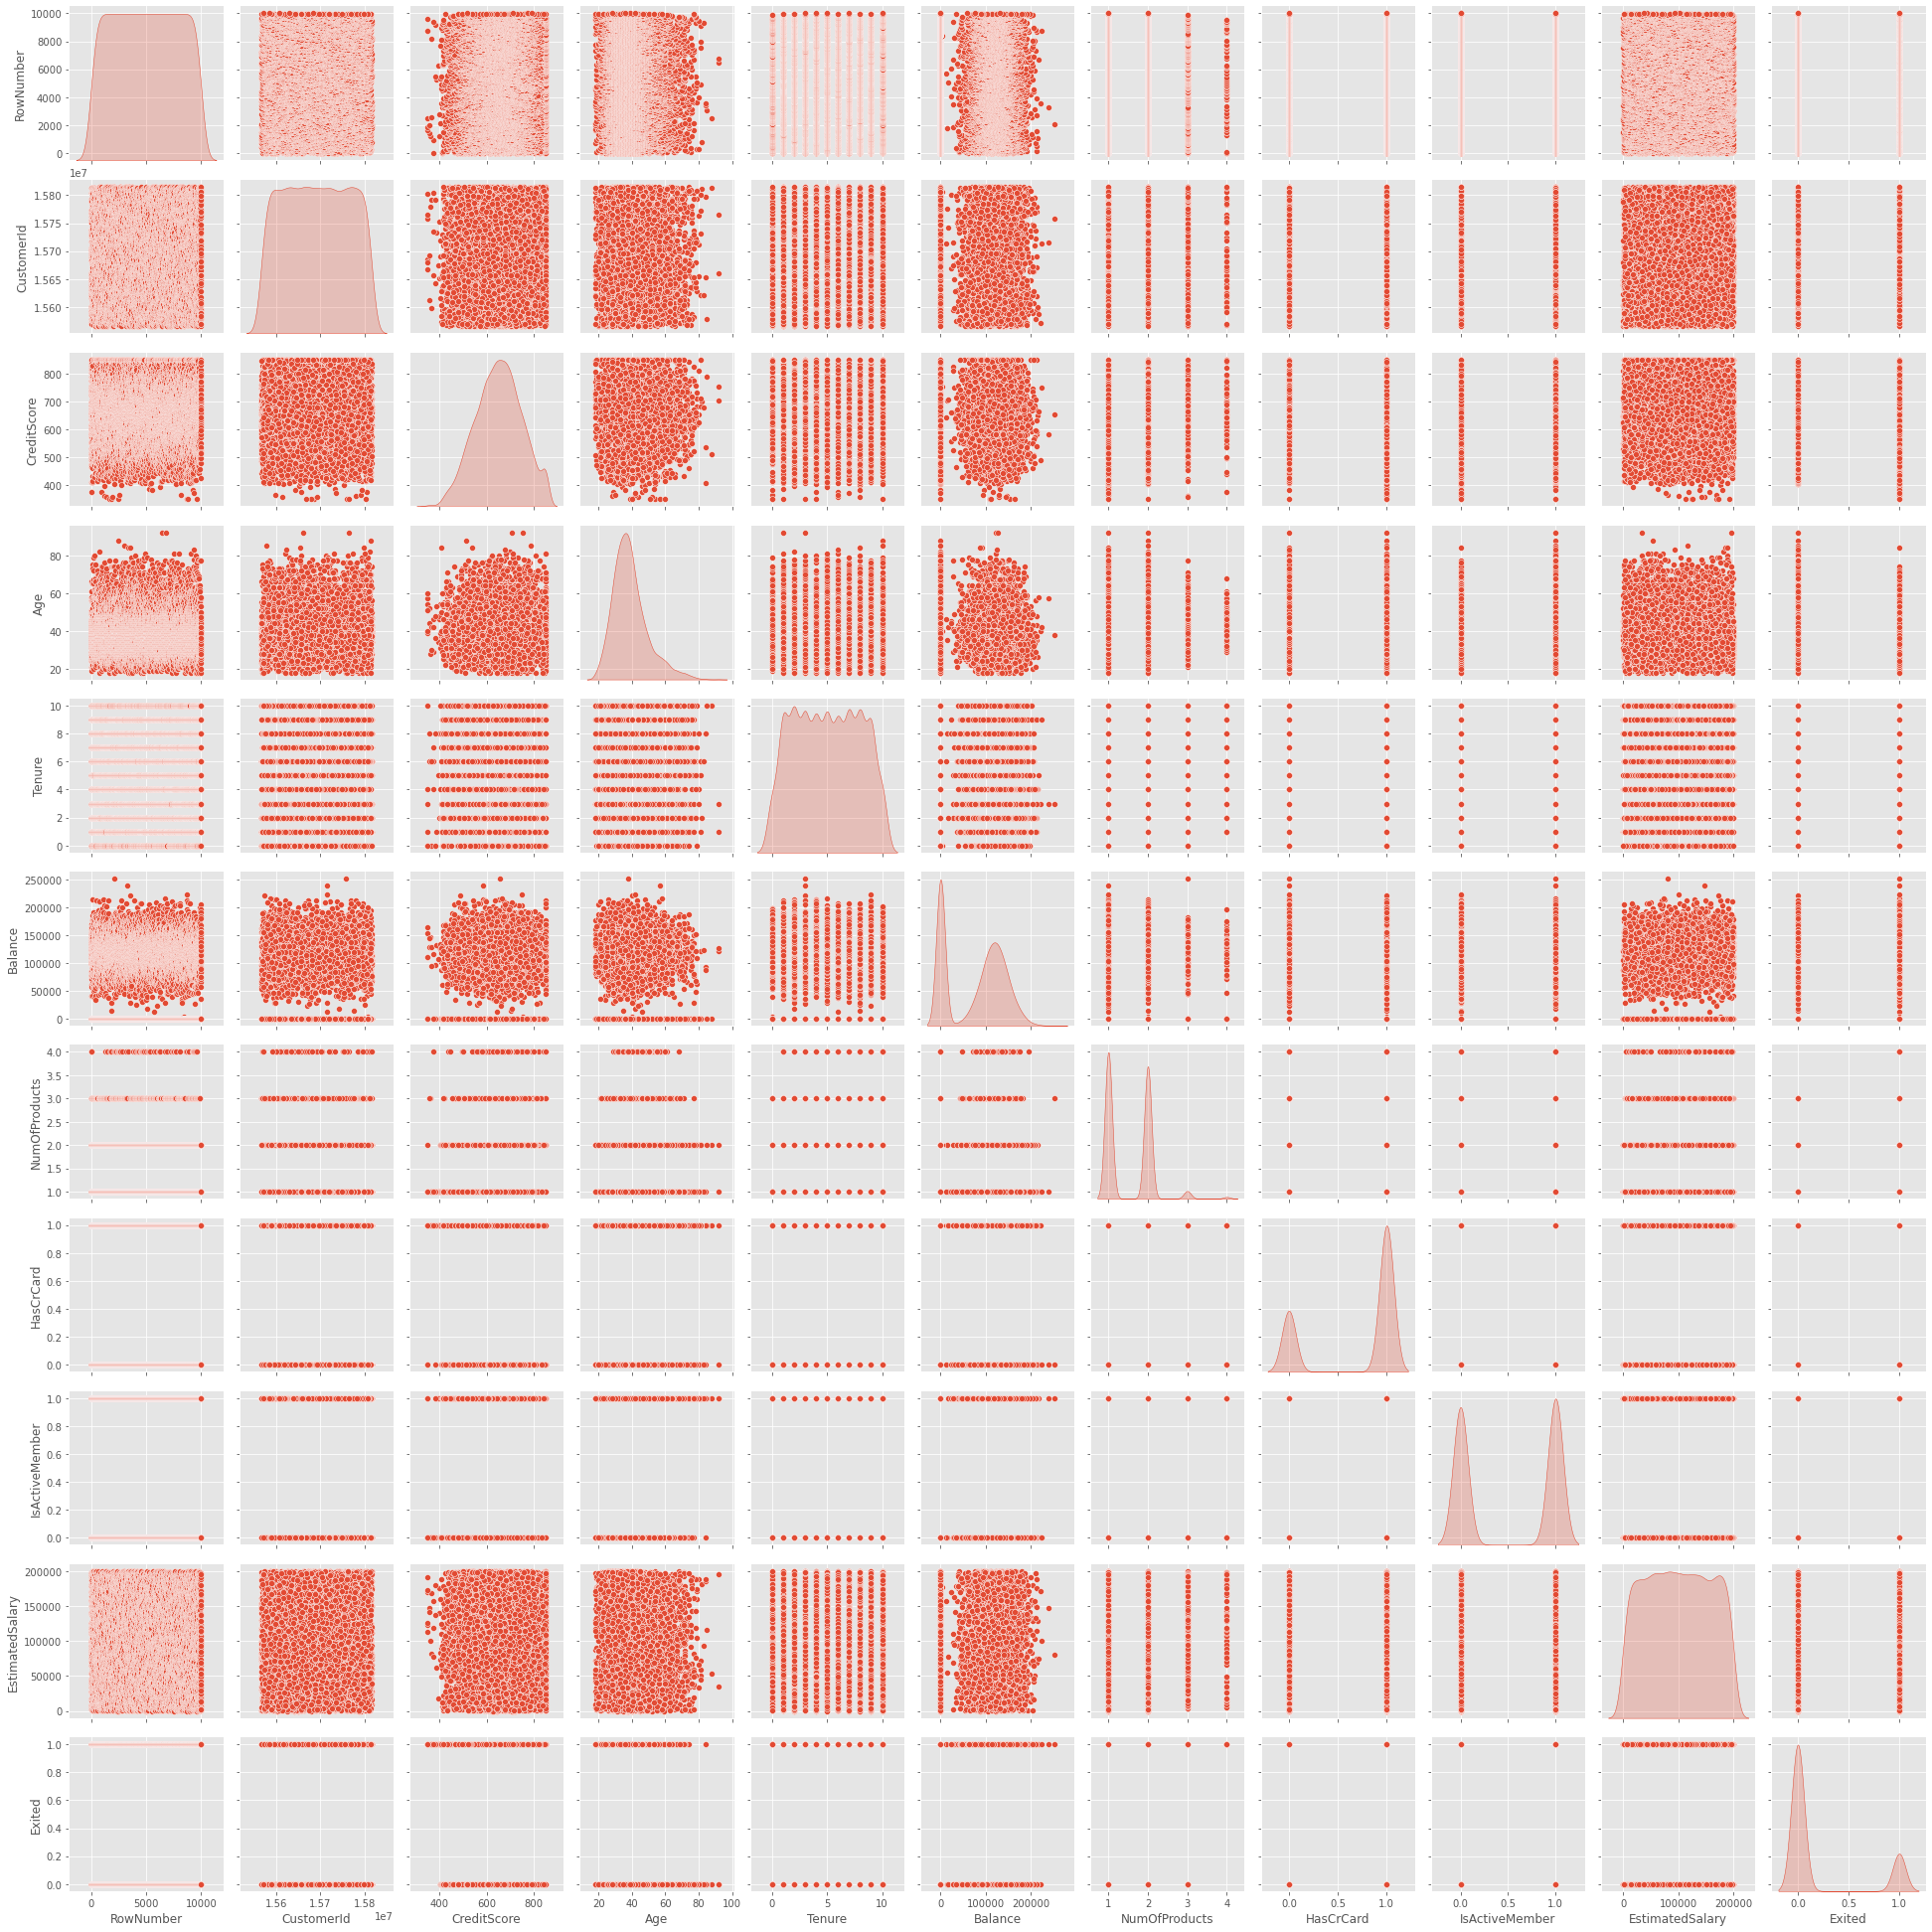

In [10]:
# Visualize features with pairplots
sns.pairplot(df,diag_kind='kde')

In [11]:
# Check target output for balance
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Observations:
- Raw dataset has 10000 records and 14 features
- Raw dataset has a mix of int64, float64, and object datatypes
- There are no missing values
- There are no duplicate rows
- Our dataset is imbalanced with only 25.6% of the customers as 'Exited'

## Data Preparation:

- "RowNumber", "CustomerId", "Surname" features will be dropped as they do not add value to our model.
- "Exited" is our target output.
- "Gender" and "Geography" features will be converted from categorical to OneHot encoding.
- We will convert all remaining features to "float32".
- We will need to scale the dataset.

In [12]:
# Drop non-relevant features from dataset
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)
df.head()

CreditScore Geography  Gender  Age  Tenure     Balance  NumOfProducts  \
0          619    France  Female   42       2       0.000              1   
1          608     Spain  Female   41       1  83,807.860              1   
2          502    France  Female   42       8 159,660.800              3   
3          699    France  Female   39       1       0.000              2   
4          850     Spain  Female   43       2 125,510.820              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1      101,348.880       1  
1          0               1      112,542.580       0  
2          1               0      113,931.570       1  
3          0               0       93,826.630       0  
4          1               1       79,084.100       0

In [13]:
# Convert categorical features to OneHot Encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

CreditScore  Age  Tenure     Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.000              1          1   
1          608   41       1  83,807.860              1          0   
2          502   42       8 159,660.800              3          1   
3          699   39       1       0.000              2          0   
4          850   43       2 125,510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1      101,348.880       1                  0   
1               1      112,542.580       0                  0   
2               0      113,931.570       1                  0   
3               0       93,826.630       0                  0   
4               1       79,084.100       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [14]:
# Convert all fields into the same data type - float
df = df.astype('float32')
df.head()

CreditScore    Age  Tenure     Balance  NumOfProducts  HasCrCard  \
0      619.000 42.000   2.000       0.000          1.000      1.000   
1      608.000 41.000   1.000  83,807.859          1.000      0.000   
2      502.000 42.000   8.000 159,660.797          3.000      1.000   
3      699.000 39.000   1.000       0.000          2.000      0.000   
4      850.000 43.000   2.000 125,510.820          1.000      1.000   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0           1.000      101,348.883   1.000              0.000   
1           1.000      112,542.578   0.000              0.000   
2           0.000      113,931.570   1.000              0.000   
3           0.000       93,826.633   0.000              0.000   
4           1.000       79,084.102   0.000              0.000   

   Geography_Spain  Gender_Male  
0            0.000        0.000  
1            1.000        0.000  
2            0.000        0.000  
3            0.000        0.000  
4            1.000        0.000

In [15]:
# Display data types and determine if any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float32
 1   Age                10000 non-null  float32
 2   Tenure             10000 non-null  float32
 3   Balance            10000 non-null  float32
 4   NumOfProducts      10000 non-null  float32
 5   HasCrCard          10000 non-null  float32
 6   IsActiveMember     10000 non-null  float32
 7   EstimatedSalary    10000 non-null  float32
 8   Exited             10000 non-null  float32
 9   Geography_Germany  10000 non-null  float32
 10  Geography_Spain    10000 non-null  float32
 11  Gender_Male        10000 non-null  float32
dtypes: float32(12)
memory usage: 468.9 KB


## Split the dataset into train, validation, and test sets

In [16]:
# Separate predictors and the target field
X = df.drop(columns = 'Exited')
y = df['Exited']

# Split data into train, validation and test

# Split all data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# Further split train into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 1)

In [17]:
# Create copies of dataframes to avoid indexing warning
[X_train, X_val, X_test, y_train, y_val, y_test] = map(lambda x: x.copy(), [X_train, X_val, X_test, y_train, y_val, y_test])

In [18]:
# Scale / Normalize the dataset
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Helper Functon(s)

In [19]:
# Creating a function for evaluating model performance
def evaluate_nn(model, train, val, test):

    loss, acc_train = model.evaluate(train, y_train, verbose=0)
    loss, acc_val = model.evaluate(val, y_val, verbose=0)
    loss, acc_test = model.evaluate(test, y_test, verbose=0)
    
    return acc_train, acc_val, acc_test

## Build Models

- We will build ANN models with ReLU, Sigmoid, and Tanh activation functions
- We will base our initial hidden layer node count on the average of our input and output layers: (11 + 1) / 2 = 6
- We will evaluate those models based on 'Accuracy' since this is the specific metric required by the problem statement


#### ReLU - SGD - 1 Hidden Layer

In [20]:
%%time
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

# Initiate the model and add layers
nn_1 = tf.keras.models.Sequential([Input(shape=(X_train.shape[1],)),    # Input layer
                                   Dense(6, activation = 'relu'),       # Hidden layer with relu activation 
                                   Dense(1, activation = 'sigmoid')])   # Output layer

# Add loss function, optimizer and evaluation metric to the model
nn_1.compile(loss = 'binary_crossentropy', 
             optimizer = 'SGD',      # Use SGD optimizer initially
             metrics = ['accuracy']) # Evaluate model based on 'accuracy' per problem statement

# Train the model
nn_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, verbose = 1)

# Score train and test set and record the results
scores = evaluate_nn(nn_1, X_train, X_val, X_test)

# Store results in a dataframe
res = pd.DataFrame({'Method': ['NN - ReLU | SGD | 1HL'], 
                    'Accuracy Train': scores[0], 
                    'Accuracy Validation': scores[1],
                    'Accuracy Test': scores[2]})

res

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6649 - accuracy: 0.6438 - val_loss: 0.5614 - val_accuracy: 0.7694
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7947 - val_loss: 0.5137 - val_accuracy: 0.7931
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7980 - val_loss: 0.4955 - val_accuracy: 0.7931
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7978 - val_loss: 0.4839 - val_accuracy: 0.7931
Epoch 5/10
200/200 [==============================] - 0s 945us/step - loss: 0.4798 - accuracy: 0.7980 - val_loss: 0.4753 - val_accuracy: 0.7931
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7986 - val_loss: 0.4685 - val_accuracy: 0.7931
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7981 - val_loss: 0.4628 - val_accuracy: 0.7944
Epoc

Method  Accuracy Train  Accuracy Validation  Accuracy Test
0  NN - ReLU | SGD | 1HL           0.803                0.800          0.802

#### Sigmoid - SGD - 1 Hidden Layer

In [21]:
%%time
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

# Initiate the model and add layers
nn_2 = tf.keras.models.Sequential([Input(shape=(X_train.shape[1],)),    # Input layer
                                   Dense(6, activation = 'sigmoid'),    # Hidden layer with sigmoid activation    
                                   Dense(1, activation = 'sigmoid')])   # Output layer

# Add loss function, optimizer and evaluation metric to the model
nn_2.compile(loss = 'binary_crossentropy', 
             optimizer = 'SGD',      # Use SGD optimizer initially
             metrics = ['accuracy']) # Evaluate model based on 'accuracy' per problem statement

# Train the model
nn_2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, verbose = 1)

# Score train and test set and record the results
scores = evaluate_nn(nn_2, X_train, X_val, X_test)

# Store results in a dataframe
res.loc[len(res)] = ['NN - Sigmoid | SGD | 1HL', scores[0], scores[1], scores[2]]
res

Epoch 1/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.6569 - val_loss: 0.5551 - val_accuracy: 0.7937
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.7981 - val_loss: 0.5229 - val_accuracy: 0.7937
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.7981 - val_loss: 0.5147 - val_accuracy: 0.7937
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.7981 - val_loss: 0.5099 - val_accuracy: 0.7937
Epoch 5/10
200/200 [==============================] - 0s 965us/step - loss: 0.4994 - accuracy: 0.7981 - val_loss: 0.5059 - val_accuracy: 0.7937
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7981 - val_loss: 0.5023 - val_accuracy: 0.7937
Epoch 7/10
200/200 [==============================] - 0s 950us/step - loss: 0.4927 - accuracy: 0.7981 - val_loss: 0.4988 - val_accuracy: 0.7937
Ep

Method  Accuracy Train  Accuracy Validation  \
0     NN - ReLU | SGD | 1HL           0.803                0.800   
1  NN - Sigmoid | SGD | 1HL           0.798                0.794   

   Accuracy Test  
0          0.802  
1          0.793

#### Tanh - SGD - 1HL

In [22]:
%%time
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

# Initiate the model and add layers
nn_3 = tf.keras.models.Sequential([Input(shape=(X_train.shape[1],)),    # Input layer
                                   Dense(6, activation = 'tanh'),       # Hidden layer with tanh activation 
                                   Dense(1, activation = 'sigmoid')])   # Output layer

# Add loss function, optimizer and evaluation metric to the model
nn_3.compile(loss = 'binary_crossentropy', 
             optimizer = 'SGD',      # Use SGD optimizer initially
             metrics = ['accuracy']) # Evaluate model based on 'accuracy' per problem statement

# Train the model
nn_3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, verbose = 1)

# Score train and test set and record the results
scores = evaluate_nn(nn_3, X_train, X_val, X_test)

# Store results in a dataframe
res.loc[len(res)] = ['NN - Tanh | SGD | 1HL', scores[0], scores[1], scores[2]]
res

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6175 - val_loss: 0.5844 - val_accuracy: 0.7419
Epoch 2/10
200/200 [==============================] - 0s 910us/step - loss: 0.5308 - accuracy: 0.7933 - val_loss: 0.5156 - val_accuracy: 0.7900
Epoch 3/10
200/200 [==============================] - 0s 950us/step - loss: 0.4875 - accuracy: 0.8008 - val_loss: 0.4859 - val_accuracy: 0.7937
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7986 - val_loss: 0.4701 - val_accuracy: 0.7944
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8000 - val_loss: 0.4604 - val_accuracy: 0.7981
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8019 - val_loss: 0.4538 - val_accuracy: 0.7981
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8020 - val_loss: 0.4491 - val_accuracy: 0.7962
Ep

Method  Accuracy Train  Accuracy Validation  \
0     NN - ReLU | SGD | 1HL           0.803                0.800   
1  NN - Sigmoid | SGD | 1HL           0.798                0.794   
2     NN - Tanh | SGD | 1HL           0.807                0.799   

   Accuracy Test  
0          0.802  
1          0.793  
2          0.807

### Model Improvements

- We identify the ReLU model as the slightly better performing model due better accuracy and lowest spread.
- We try improving its result by trying a few different optimizers
- We try improving its result by adding an additional hidden layer
- We wiil then try balancing the dataset using SMOTE and check again for any improvements

#### ReLU - Adam - 1 Hidden Layer

In [23]:
%%time
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

# Initiate the model and add layers
nn_4 = tf.keras.models.Sequential([Input(shape=(X_train.shape[1],)),    # Input layer
                                   Dense(6, activation = 'relu'),       # Hidden layer with relu activation 
                                   Dense(1, activation = 'sigmoid')])   # Output layer

# Add loss function, optimizer and evaluation metric to the model
nn_4.compile(loss = 'binary_crossentropy', 
             optimizer = 'Adam',     # Try the Adam optimizer
             metrics = ['accuracy']) # Evaluate model based on 'accuracy' per problem statement

# Train the model
nn_4.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, verbose = 1)

# Score train and test set and record the results
scores = evaluate_nn(nn_4, X_train, X_val, X_test)

# Store results in a dataframe
res.loc[len(res)] = ['NN - ReLU | Adam | 1HL', scores[0], scores[1], scores[2]]
res

Epoch 1/10
200/200 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.5844 - val_loss: 0.5791 - val_accuracy: 0.7487
Epoch 2/10
200/200 [==============================] - 0s 980us/step - loss: 0.5177 - accuracy: 0.7870 - val_loss: 0.4843 - val_accuracy: 0.7962
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.8003 - val_loss: 0.4587 - val_accuracy: 0.7956
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8020 - val_loss: 0.4478 - val_accuracy: 0.7969
Epoch 5/10
200/200 [==============================] - 0s 980us/step - loss: 0.4436 - accuracy: 0.8062 - val_loss: 0.4417 - val_accuracy: 0.8031
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.8095 - val_loss: 0.4376 - val_accuracy: 0.8044
Epoch 7/10
200/200 [==============================] - 0s 985us/step - loss: 0.4329 - accuracy: 0.8133 - val_loss: 0.4340 - val_accuracy: 0.8075


Method  Accuracy Train  Accuracy Validation  \
0     NN - ReLU | SGD | 1HL           0.803                0.800   
1  NN - Sigmoid | SGD | 1HL           0.798                0.794   
2     NN - Tanh | SGD | 1HL           0.807                0.799   
3    NN - ReLU | Adam | 1HL           0.822                0.816   

   Accuracy Test  
0          0.802  
1          0.793  
2          0.807  
3          0.822

#### ReLU - RMSProp - 1 Hidden Layer

In [24]:
%%time
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

# Initiate the model and add layers
nn_5 = tf.keras.models.Sequential([Input(shape=(X_train.shape[1],)),    # Input layer
                                   Dense(6, activation = 'relu'),       # Hidden layer with relu activation 
                                   Dense(1, activation = 'sigmoid')])   # Output layer

# Add loss function, optimizer and evaluation metric to the model
nn_5.compile(loss = 'binary_crossentropy', 
             optimizer = 'RMSprop',  # Try the RMSprop optimizer
             metrics = ['accuracy']) # Evaluate model based on 'accuracy' per problem statement

# Train the model
nn_5.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, verbose = 1)

# Score train and test set and record the results
scores = evaluate_nn(nn_5, X_train, X_val, X_test)

# Store results in a dataframe
res.loc[len(res)] = ['NN - ReLU | RMSProp | 1HL', scores[0], scores[1], scores[2]]
res

Epoch 1/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.6053 - val_loss: 0.5616 - val_accuracy: 0.7631
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7952 - val_loss: 0.4756 - val_accuracy: 0.7962
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8027 - val_loss: 0.4550 - val_accuracy: 0.7975
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.8064 - val_loss: 0.4441 - val_accuracy: 0.8006
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8106 - val_loss: 0.4381 - val_accuracy: 0.8031
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8123 - val_loss: 0.4343 - val_accuracy: 0.8062
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8167 - val_loss: 0.4318 - val_accuracy: 0.8131
Epoch 

Method  Accuracy Train  Accuracy Validation  \
0      NN - ReLU | SGD | 1HL           0.803                0.800   
1   NN - Sigmoid | SGD | 1HL           0.798                0.794   
2      NN - Tanh | SGD | 1HL           0.807                0.799   
3     NN - ReLU | Adam | 1HL           0.822                0.816   
4  NN - ReLU | RMSProp | 1HL           0.824                0.822   

   Accuracy Test  
0          0.802  
1          0.793  
2          0.807  
3          0.822  
4          0.826

#### ReLU - RMSProp - 2 Hidden Layers

- We noted some improvemnts by using the RMSProp optimizer, so we will use this model to try for further improvements.

In [26]:
%%time
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

# Initiate the model and add layers
nn_6 = tf.keras.models.Sequential([Input(shape=(X_train.shape[1],)),    # Input layer
                                   Dense(6, activation = 'relu'),       # Hidden layer with relu activation 
                                   Dense(6, activation = 'relu'),       # Add a second hidden layer
                                   Dense(1, activation = 'sigmoid')])   # Output layer

# Add loss function, optimizer and evaluation metric to the model
nn_6.compile(loss = 'binary_crossentropy', 
             optimizer = 'RMSprop',  # Try the RMSprop optimizer
             metrics = ['accuracy']) # Evaluate model based on 'accuracy' per problem statement

# Train the model
nn_6.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, verbose = 1)

# Score train and test set and record the results
scores = evaluate_nn(nn_6, X_train, X_val, X_test)

# Store results in a dataframe
res.loc[len(res)] = ['NN - ReLU | RMSProp | 2HL', scores[0], scores[1], scores[2]]
res

Epoch 1/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.7980 - val_loss: 0.4819 - val_accuracy: 0.7937
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7981 - val_loss: 0.4567 - val_accuracy: 0.7944
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.8034 - val_loss: 0.4458 - val_accuracy: 0.8087
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8083 - val_loss: 0.4406 - val_accuracy: 0.8112
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8102 - val_loss: 0.4372 - val_accuracy: 0.8125
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8097 - val_loss: 0.4349 - val_accuracy: 0.8150
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8131 - val_loss: 0.4328 - val_accuracy: 0.8144
Epoch 

Method  Accuracy Train  Accuracy Validation  \
0      NN - ReLU | SGD | 1HL           0.803                0.800   
1   NN - Sigmoid | SGD | 1HL           0.798                0.794   
2      NN - Tanh | SGD | 1HL           0.807                0.799   
3     NN - ReLU | Adam | 1HL           0.822                0.816   
4  NN - ReLU | RMSProp | 1HL           0.824                0.822   
5  NN - ReLU | RMSProp | 2HL           0.822                0.816   

   Accuracy Test  
0          0.802  
1          0.793  
2          0.807  
3          0.822  
4          0.826  
5          0.821

#### ReLU - RMSprop - 1 Hidden Layer - SMOTE

- We note that there was not much improvement by adding the second hidden layer; we will revert to using ReLU - RMSprop - 1HL 

In [27]:
# import SMOTE
from imblearn.over_sampling import SMOTE

# We apply SMOTE only on train data to not introduce any data leak
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [28]:
%%time
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

# Initiate the model and add layers
nn_6 = tf.keras.models.Sequential([Input(shape=(X_train.shape[1],)),    # Input layer
                                   Dense(6, activation = 'relu'),       # Hidden layer with relu activation
                                   Dense(1, activation = 'sigmoid')])   # Output layer

# Add loss function, optimizer and evaluation metric to the model
nn_6.compile(loss = 'binary_crossentropy', 
             optimizer = 'RMSprop',  # RMSprop Optimizer
             metrics = ['accuracy']) # Evaluate model based on 'accuracy' per problem statement

# Train the model
nn_6.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, verbose = 1)

# Score train and test set and record the results
scores = evaluate_nn(nn_6, X_train, X_val, X_test)

# Store results in a dataframe
res.loc[len(res)] = ['NN - reLU | RMSpop | 1HL | SMOTE', scores[0], scores[1], scores[2]]
res


Epoch 1/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6780 - accuracy: 0.5860 - val_loss: 0.6473 - val_accuracy: 0.6481
Epoch 2/10
320/320 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6763 - val_loss: 0.6113 - val_accuracy: 0.6837
Epoch 3/10
320/320 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.6976 - val_loss: 0.6012 - val_accuracy: 0.6988
Epoch 4/10
320/320 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7056 - val_loss: 0.5851 - val_accuracy: 0.7050
Epoch 5/10
320/320 [==============================] - 0s 944us/step - loss: 0.5594 - accuracy: 0.7143 - val_loss: 0.5682 - val_accuracy: 0.7106
Epoch 6/10
320/320 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.7267 - val_loss: 0.5631 - val_accuracy: 0.7106
Epoch 7/10
320/320 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.7384 - val_loss: 0.5465 - val_accuracy: 0.7150
Epoc

Method  Accuracy Train  Accuracy Validation  \
0             NN - ReLU | SGD | 1HL           0.803                0.800   
1          NN - Sigmoid | SGD | 1HL           0.798                0.794   
2             NN - Tanh | SGD | 1HL           0.807                0.799   
3            NN - ReLU | Adam | 1HL           0.822                0.816   
4         NN - ReLU | RMSProp | 1HL           0.824                0.822   
5         NN - ReLU | RMSProp | 2HL           0.822                0.816   
6  NN - reLU | RMSpop | 1HL | SMOTE           0.773                0.719   

   Accuracy Test  
0          0.802  
1          0.793  
2          0.807  
3          0.822  
4          0.826  
5          0.821  
6          0.754

## Conclusion

In [29]:
# Display all model results
res

Method  Accuracy Train  Accuracy Validation  \
0             NN - ReLU | SGD | 1HL           0.803                0.800   
1          NN - Sigmoid | SGD | 1HL           0.798                0.794   
2             NN - Tanh | SGD | 1HL           0.807                0.799   
3            NN - ReLU | Adam | 1HL           0.822                0.816   
4         NN - ReLU | RMSProp | 1HL           0.824                0.822   
5         NN - ReLU | RMSProp | 2HL           0.822                0.816   
6  NN - reLU | RMSpop | 1HL | SMOTE           0.773                0.719   

   Accuracy Test  
0          0.802  
1          0.793  
2          0.807  
3          0.822  
4          0.826  
5          0.821  
6          0.754

### Remarks:
- Based on the accuracy metric and lower-spread, the ReLU model with RMSProp optimizer and 1 Hidden Layer appears to be the best performer of models tested.
- We may be able to improve the model prediction of 'Exited' by using a different metric depending on the bank's overall objectives.  

In [32]:
# Display results for best performer
res.loc[4]

Method                 NN - ReLU | RMSProp | 1HL
Accuracy Train                             0.824
Accuracy Validation                        0.822
Accuracy Test                              0.826
Name: 4, dtype: object

In [31]:
# Score test set with the final model and compare to actuals
p = nn_5.predict(X_test).flatten()
pd.crosstab(y_test, np.where(p > 0.5, 1,0), colnames = ['Predictions'])

Predictions     0    1
Exited                
0.000        1530   55
1.000         292  123